In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [7]:
beml_df = pd.read_csv("/Users/chira/Downloads/BEML.csv")

beml_df[0:5]
#beml_df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.0,1151.00,1121.00,1134.0,1135.60,101651.0,1157.18
1,2010-01-05,1146.8,1149.00,1128.75,1135.0,1134.60,59504.0,676.47
2,2010-01-06,1140.0,1164.25,1130.05,1137.0,1139.60,128908.0,1482.84
3,2010-01-07,1142.0,1159.40,1119.20,1141.0,1144.15,117871.0,1352.98
4,2010-01-08,1156.0,1172.00,1140.00,1141.2,1144.05,170063.0,1971.42


In [11]:
glaxo_df = pd.read_csv("/Users/chira/Downloads/GLAXO.csv")
glaxo_df[0:5]

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11


In [13]:
beml_df = beml_df[['Date', 'Close']]
glaxo_df = glaxo_df[['Date','Close']]

In [4]:
beml_df

,Date,Close
0,2010-01-04,1135.60
1,2010-01-05,1134.60
2,2010-01-06,1139.60
3,2010-01-07,1144.15
4,2010-01-08,1144.05
...,...,...
1734,2016-12-26,950.25
1735,2016-12-27,975.70
1736,2016-12-28,974.40
1737,2016-12-29,986.05


In [14]:
glaxo_df

,Date,Close
0,2010-01-04,1625.65
1,2010-01-05,1616.80
2,2010-01-06,1638.50
3,2010-01-07,1648.70
4,2010-01-08,1639.80
...,...,...
1734,2016-12-26,2723.50
1735,2016-12-27,2701.75
1736,2016-12-28,2702.15
1737,2016-12-29,2727.90


In [15]:
beml_df = beml_df.set_index(pd.DatetimeIndex(beml_df['Date']))
glaxo_df = glaxo_df.set_index(pd.DatetimeIndex(glaxo_df['Date']))

In [6]:
beml_df

,Date,Close
Date,,
2010-01-04,2010-01-04,1135.60
2010-01-05,2010-01-05,1134.60
2010-01-06,2010-01-06,1139.60
2010-01-07,2010-01-07,1144.15
2010-01-08,2010-01-08,1144.05
...,...,...
2016-12-26,2016-12-26,950.25
2016-12-27,2016-12-27,975.70
2016-12-28,2016-12-28,974.40


In [16]:
glaxo_df

,Date,Close
Date,,
2010-01-04,2010-01-04,1625.65
2010-01-05,2010-01-05,1616.80
2010-01-06,2010-01-06,1638.50
2010-01-07,2010-01-07,1648.70
2010-01-08,2010-01-08,1639.80
...,...,...
2016-12-26,2016-12-26,2723.50
2016-12-27,2016-12-27,2701.75
2016-12-28,2016-12-28,2702.15


Text(0, 0.5, 'Close Price')

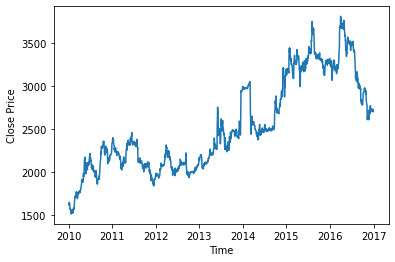

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

plt.plot(glaxo_df.Close)
plt.xlabel('Time')
plt.ylabel('Close Price')

Text(0, 0.5, 'Close Price')

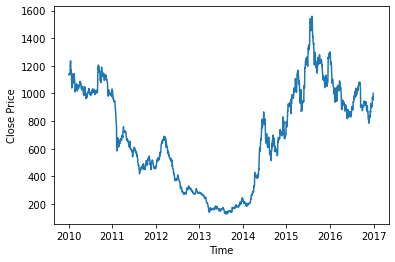

In [19]:
plt.plot(beml_df.Close)
plt.xlabel('Time')
plt.ylabel('Close Price')

In [20]:
glaxo_df['gain']= glaxo_df.Close.pct_change(periods = 1)
beml_df['gain']= beml_df.Close.pct_change(periods = 1)

In [21]:
glaxo_df.head()

,Date,Close,gain
Date,,,
2010-01-04,2010-01-04,1625.65,NaN
2010-01-05,2010-01-05,1616.80,-0.005444
2010-01-06,2010-01-06,1638.50,0.013422
2010-01-07,2010-01-07,1648.70,0.006225
2010-01-08,2010-01-08,1639.80,-0.005398


In [22]:
glaxo_df = glaxo_df.dropna()
beml_df = beml_df.dropna()

In [24]:
from scipy import stats
stats.norm.ppf(0.975)

1.959963984540054

In [26]:
#calculate the confidence interval for gains in glaxo and beml

glaxo_df_ci = stats.norm.interval(0.95,loc=glaxo_df.gain.mean(),scale=glaxo_df.gain.std())

print('Gain at 95% confidence interval is :', np.round(glaxo_df_ci,4))

Gain at 95% confidence interval is : [-0.0258  0.0266]


In [27]:
beml_df_ci = stats.norm.interval(0.95,loc=beml_df.gain.mean(),scale=beml_df.gain.std())

print('Gain at 95% confidence interval is :', np.round(beml_df_ci,4))

Gain at 95% confidence interval is : [-0.0515  0.0521]


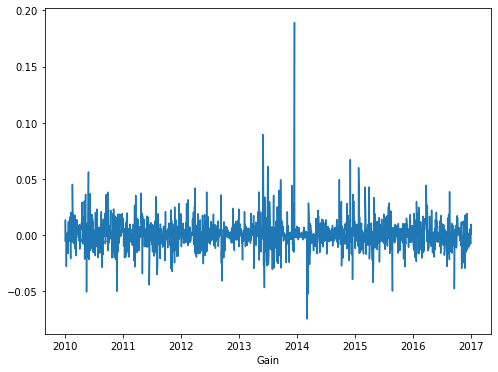

In [28]:
#Plot the gains

plt.figure(figsize = (8,6));
plt.plot(glaxo_df.index,glaxo_df.gain);
plt.xlabel('Time');
plt.xlabel('Gain');

C:\Users\chira\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


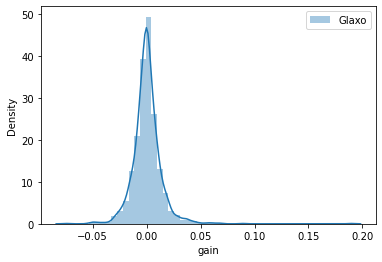

In [31]:
#Plot a distributive plot for gains

sns.distplot(glaxo_df.gain, label = 'Glaxo');
plt.xlabel('gain');
plt.ylabel('Density');
plt.legend();

C:\Users\chira\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


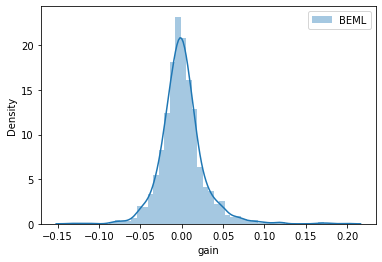

In [32]:
sns.distplot(beml_df.gain,label = 'BEML');
plt.xlabel('gain');
plt.ylabel('Density');
plt.legend();

In [33]:
print('Mean:', round(glaxo_df.gain.mean(), 4))
print('Standard Deviation: ', round(glaxo_df.gain.std(), 4))

Mean: 0.0004
Standard Deviation:  0.0134


In [34]:
print('Mean: ', round(beml_df.gain.mean(), 4))
print('Standard Deviation: ', round(beml_df.gain.std(), 4))

Mean:  0.0003
Standard Deviation:  0.0264


In [35]:
from scipy import stats
#Probability of making 2% loss or higher in Glaxo
stats.norm.cdf( -0.02,
loc=glaxo_df.gain.mean(),
scale=glaxo_df.gain.std())

0.06352488667177397

In [37]:
from scipy import stats
#Probability of making 2% gain or higher in Glaxo
1 - stats.norm.cdf( 0.02,
loc=glaxo_df.gain.mean(),
scale=glaxo_df.gain.std())

0.07104511457618568

## FOR BEML 

In [38]:
from scipy import stats
#Probability of making 2% loss or higher in BEML
stats.norm.cdf( -0.02,
loc=beml_df.gain.mean(),
scale=beml_df.gain.std())

0.22155987503755292

In [39]:
from scipy import stats
#Probability of making 2% Gain or higher in BEML
1 - stats.norm.cdf( 0.02,
loc=beml_df.gain.mean(),
scale=beml_df.gain.std())

0.22769829484075343

In [45]:
from scipy import stats

1-stats.t.cdf(2.23,df =79)

0.014292908802574056